https://colab.research.google.com/drive/1pC4pJHAIA8e0zdD02kFXu7fngrMguOnx?usp=sharing#scrollTo=53ojIkijNWiP

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [282]:
def read_wav(wave_path):
    # `sr=None`: Preserve the native sampling rate of the file.
    y, sr = librosa.load(wave_path, sr=None)
    return y, sr


def show_wave(wave_path):
    y, sr = read_wav(wave_path)

    plt.figure(figsize=(22, 6))
    # plt.ylim([-0.3, 0.3])
    # plt.xlim([0, 3])
    librosa.display.waveshow(y=y, sr=sr);


# Spectogram
# Short-time Fourier transform (STFT). The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
# `D`: The magnitude of frequency.
    # `hop_length`: The number of audio samples between adjacent STFT columns. Smaller values increase the number of columns in D without affecting the frequency resolution of the STFT.
def show_spectogram(wave_path):
    y, sr = read_wav(wave_path)

    D = librosa.stft(y, n_fft=2048, hop_length=int(sr/100))
    S = np.abs(D)
    # Convert an amplitude spectrogram to dB-scaled spectrogram.
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    plt.figure(figsize=(16, 6))
    librosa.display.specshow(S_db, x_axis="time", y_axis="log");
    plt.colorbar(format="%+2.0f dB");


def show_melspectogram(wave_path):
    y, sr = read_wav(wave_path)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    plt.figure(figsize=(16, 6))
    librosa.display.specshow(S_db, x_axis="time", y_axis="log");
    plt.colorbar(format="%+2.0f dB");


def get_tempo(wave_path):
    y, sr = read_wav(wave_path)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    zero_crossings = librosa.zero_crossings(y, pad=False)
    
    return tempo, sum(zero_crossings)


# def get_buffers(wave_path, threshold=0.1):
#     buffer_beginning = np.argmax(y > threshold)/sr
#     buffer_end = np.argmax(np.flip(y) > threshold)/sr
#     return buffer_beginning, buffer_end


# def is_min_buffer(wave_path, threshold=0.1, min_buffer_time=0.3):
#     buffer_beginning, buffer_end = get_buffers(wave_path, threshold)

#     ls_error = list()
#     if buffer_beginning < min_buffer_time:
#         ls_error.append("not_enough_buffer_in_the_beginning")
#     if buffer_end < min_buffer_time:
#         ls_error.append("not_enough_buffer_at_the_end")
#     return ls_error


def split_audio(wave_path, top_db=20):
    y, sr = read_wav(wave_path)

    return librosa.effects.split(y, top_db=top_db)/sr


def detect_utterance_period(wave_path, top_db=20):
    y, sr = read_wav(wave_path)

    return librosa.effects.split(y, top_db=top_db)


def is_min_buffer(wave_path, top_db=20, min_buffer_time=0.3):
    y, sr = read_wav(wave_path)
    
    _, index = librosa.effects.trim(y, top_db=top_db)

    buffer_beginning = (index/sr)[0]
    buffer_end = (index/sr)[-1]

    ls_err = list()
    if buffer_beginning < min_buffer_time:
        ls_err.append("not_enough_buffer_in_the_beginning")
    if buffer_end < min_buffer_time:
        ls_err.append("not_enough_buffer_at_the_end")
    return ls_err


def is_one_utterance_period(wave_path, top_db=40):
    y, sr = read_wav(wave_path)

    ls_err = list()
    if detect_utterance_period(wave_path, top_db=top_db).shape[0] > 1:
        ls_err.append("multiple_utterance_periods")
    return ls_err

25.025986394557822
['not_enough_buffer_in_the_beginning']
['multiple_utterance_periods']


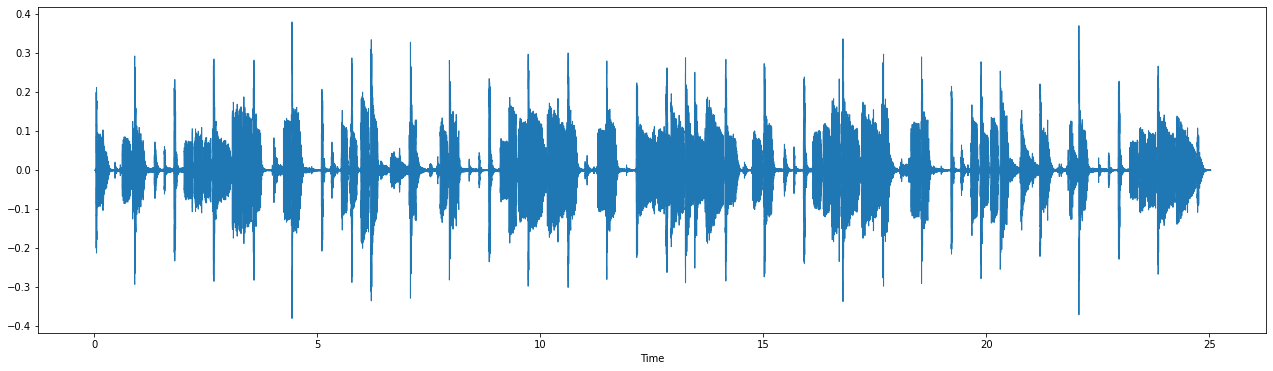

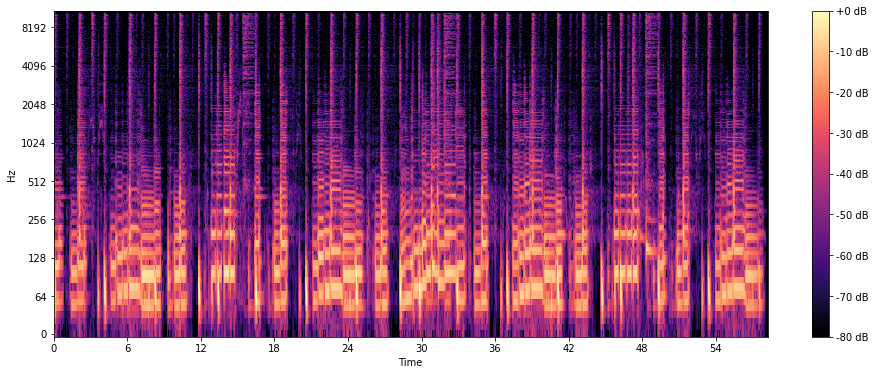

In [283]:
# wave_path = "/Users/jongbeom.kim/Desktop/workspace/Github/Work/flitto/2022-PB-01/예제 NG 샘플(분석중)/(2040)female_c_43_0309_fast.wav"
# wave_path = "/Users/jongbeom.kim/Desktop/workspace/Github/Work/flitto/2022-PB-01/예제 NG 샘플(분석중)/(2040)male_음절별 긴 시간간격_normal.wav"
# wave_path = "/Users/jongbeom.kim/Desktop/workspace/Github/Work/flitto/2022-PB-01/예제 NG 샘플(분석중)/(2040)male_파열음_pop noise_normal.wav"
wave_path = librosa.ex('choice')
y, sr = read_wav(wave_path)
print(len(y)/sr)
print(is_min_buffer(wave_path))
# print(detect_utterance_period(wave_path))
print(is_one_utterance_period(wave_path))
show_wave(wave_path)
show_spectogram(wave_path)

In [81]:
get_tempo("/Users/jongbeom.kim/Desktop/workspace/Github/Work/flitto/2022-PB-01/예제 NG 샘플/NG/(2040)male_w_9_0414_normal.wav")

(117.45383522727273, 5100)